In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

C:\Users\Laptop\AppData\Local\Temp\ipykernel_23840\4135553585.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dataset = pd.read_csv('haberman.csv')
print(dataset.head(5))

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


In [3]:
print(dataset.info())
print("Features:", len(dataset.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None
Features: 4


In [4]:
print(dataset.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [5]:
print(dataset[['status']].value_counts())

status
1         225
2          81
Name: count, dtype: int64


<Axes: xlabel='nodes', ylabel='year'>

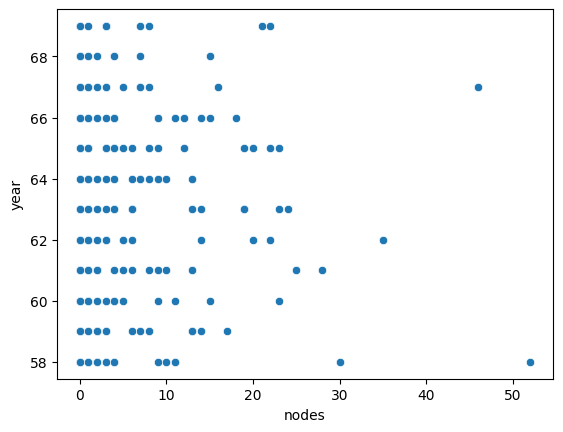

In [6]:
sns.scatterplot(data=dataset, x='nodes', y='year')

<Axes: xlabel='nodes', ylabel='year'>

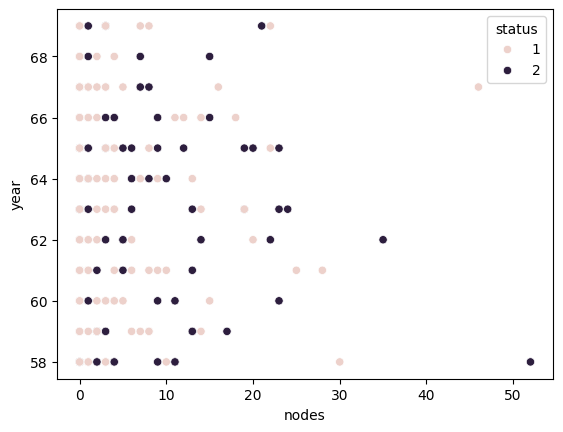

In [7]:
sns.scatterplot(data=dataset, x='nodes', y='year', hue='status')

In [8]:
import plotly.express as px

fig3d = px.scatter_3d(dataset, x='age', y='year', z='nodes', color='status', height=1000)
fig3d.show()

we are not able to distinguish between status 1 and 2 linearly with the help of this 3d plot 

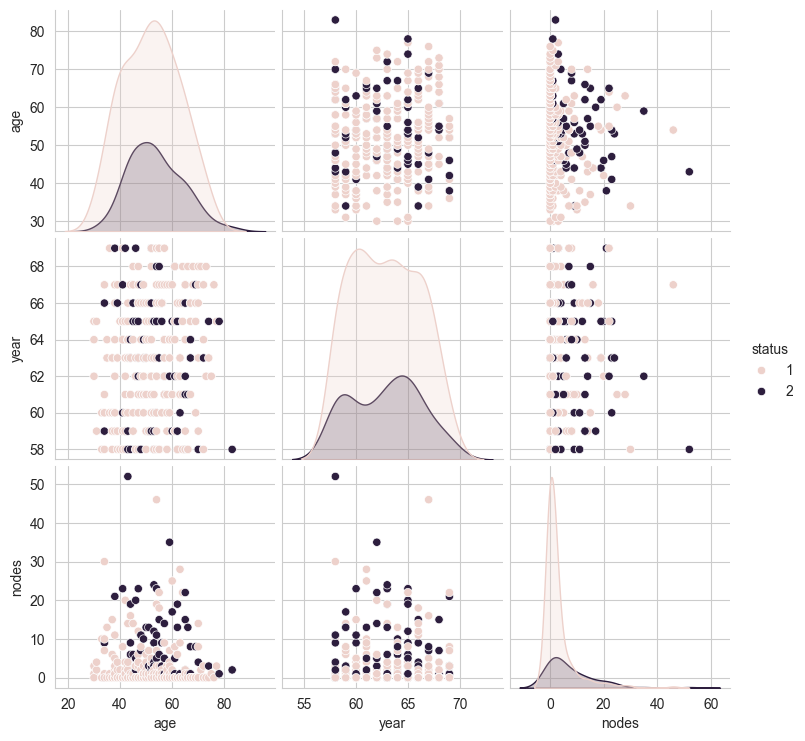

In [9]:
sns.set_style("whitegrid")
sns.pairplot(dataset, hue='status')
plt.show()

in all the plots above there is significant overlab which prevents us to draw any meaningful conclusion

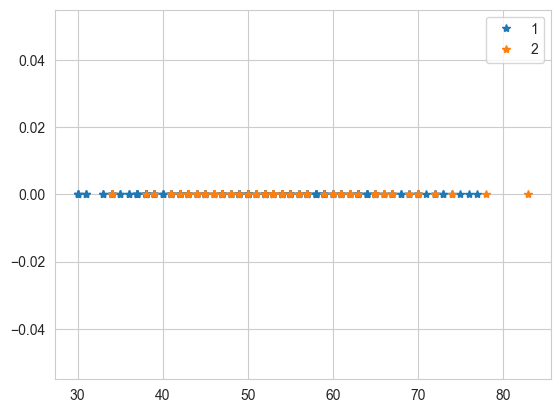

In [23]:
import numpy as np

for i in dataset['status'].unique():
    status = dataset[dataset['status'] == i]
    plt.plot(status['age'], np.zeros_like(status['age']), '*')
plt.legend(dataset['status'].unique())
plt.show()

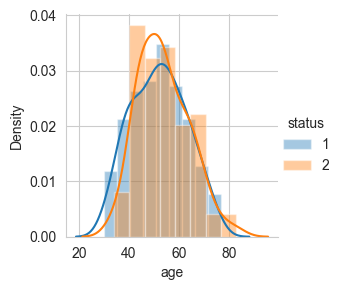

In [11]:
sns.FacetGrid(dataset, hue='status').map(sns.distplot, 'age').add_legend()

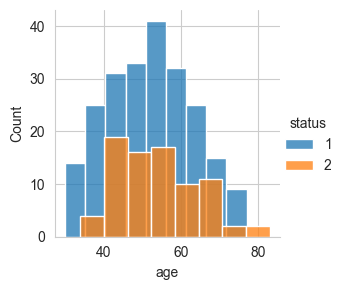

In [12]:
sns.FacetGrid(dataset, hue='status').map(sns.histplot, 'age').add_legend()

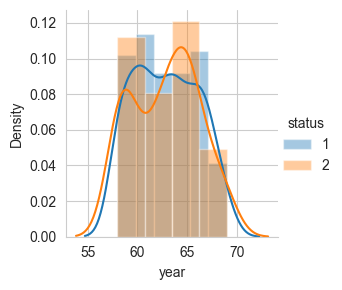

In [13]:
sns.FacetGrid(dataset, hue='status').map(sns.distplot, 'year').add_legend()

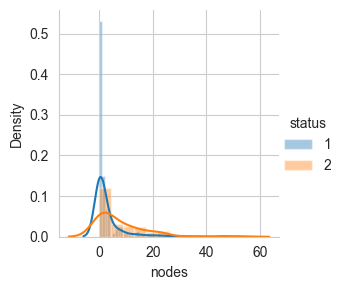

In [14]:
sns.FacetGrid(dataset, hue='status').map(sns.distplot, 'nodes').add_legend()

For Status: 1
[0.01134752 0.02269504 0.02647754 0.01985816 0.03498818 0.03498818
 0.01985816 0.02364066 0.01323877 0.00567376]
[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]


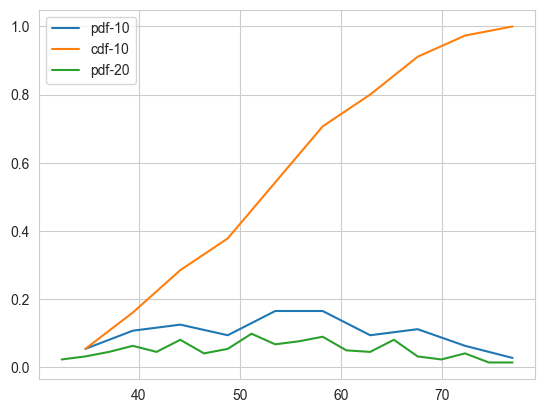

For Status: 2
[0.00755858 0.02519526 0.04031242 0.04031242 0.02771479 0.02519526
 0.02015621 0.01007811 0.00503905 0.00251953]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
[0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]


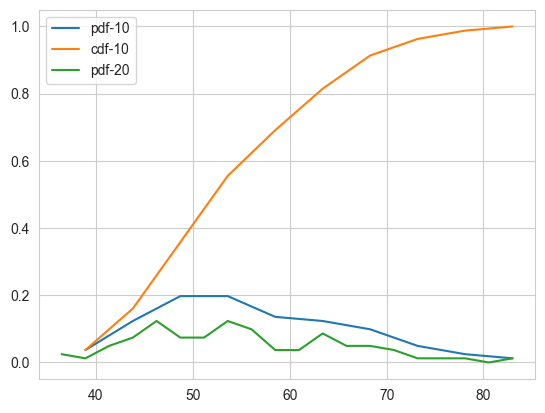

In [26]:

for status in dataset['status'].unique():
    print("For Status:", status)
    haderman_status = dataset[dataset['status'] == status]
    counts, bin_edges = np.histogram(haderman_status['age'], bins=10, 
                                    density = True)
    print(counts)
    pdf = counts/(sum(counts))
    print(pdf)
    print(bin_edges)
    cdf = np.cumsum(pdf)
    print(cdf)
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:], cdf)


    counts, bin_edges = np.histogram(haderman_status['age'], bins=20, 
                                    density = True)
    pdf = counts/(sum(counts))
    plt.plot(bin_edges[1:],pdf)
    plt.legend(['pdf-10', 'cdf-10', 'pdf-20'])
    plt.show()



For Status: 1
[0.16969697 0.0969697  0.09292929 0.06464646 0.08888889 0.09292929
 0.06060606 0.08888889 0.08484848 0.06868687]
[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]


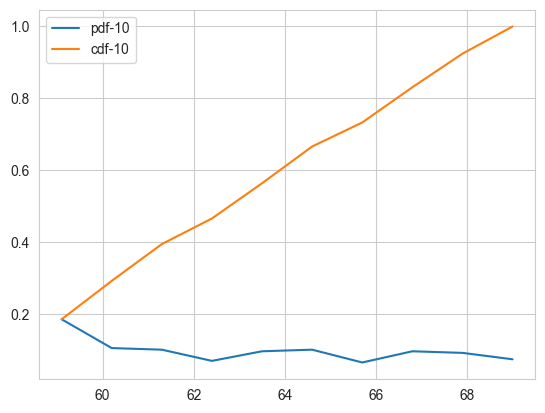

For Status: 2
[0.23569024 0.04489338 0.03367003 0.07856341 0.08978676 0.08978676
 0.14590348 0.06734007 0.04489338 0.07856341]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.30864198 0.34567901 0.43209877 0.5308642  0.62962963
 0.79012346 0.86419753 0.91358025 1.        ]


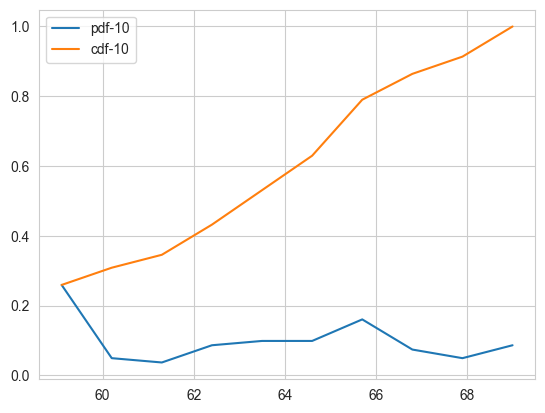

In [27]:

for status in dataset['status'].unique():
    print("For Status:", status)
    haderman_status = dataset[dataset['status'] == status]
    counts, bin_edges = np.histogram(haderman_status['year'], bins=10, 
                                    density = True)
    print(counts)
    pdf = counts/(sum(counts))
    print(pdf)
    print(bin_edges)
    cdf = np.cumsum(pdf)
    print(cdf)
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:], cdf)
    plt.legend(['pdf-10', 'cdf-10'])
    plt.show()



For Status: 1
[0.18164251 0.0173913  0.00483092 0.0057971  0.00386473 0.00096618
 0.00193237 0.         0.         0.00096618]
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]


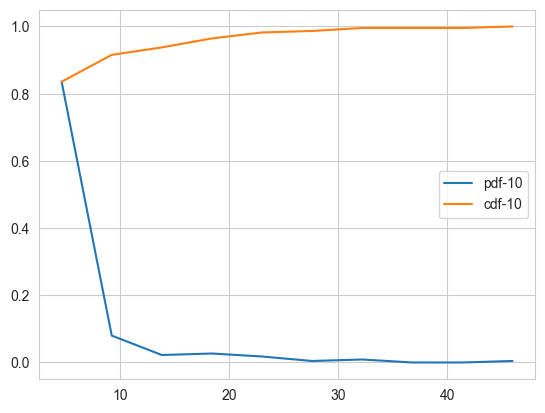

For Status: 2
[0.10921178 0.02849003 0.02611586 0.00949668 0.01424501 0.
 0.00237417 0.         0.         0.00237417]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


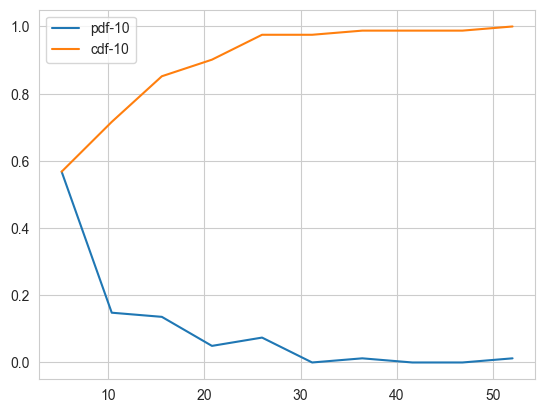

In [28]:

for status in dataset['status'].unique():
    print("For Status:", status)
    haderman_status = dataset[dataset['status'] == status]
    counts, bin_edges = np.histogram(haderman_status['nodes'], bins=10, 
                                    density = True)
    print(counts)
    pdf = counts/(sum(counts))
    print(pdf)
    print(bin_edges)
    cdf = np.cumsum(pdf)
    print(cdf)
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:], cdf)
    plt.legend(['pdf-10', 'cdf-10'])
    plt.show()



from all the above graph we can see the CDF and PDf but the data is not able to be linearly seperable

In [18]:
print("For age only\n")
feature = 'age'
for status in dataset['status'].unique():
    print("Status:", status)
    print("Mean:", dataset[dataset['status'] == status][feature].mean())
    print("Variance", dataset[dataset['status'] == status][feature].var())
    print("Standard Deviation:", dataset[dataset['status'] == status][feature].std())
    print()


For age only

Status: 1
Mean: 52.01777777777778
Variance 121.26753968253968
Standard Deviation: 11.012154179929542

Status: 2
Mean: 53.67901234567901
Variance 103.37067901234568
Standard Deviation: 10.167137208297412



In [19]:
from statsmodels import robust

print("For age only\n")
feature = 'age'
for status in dataset['status'].unique():
    print("Status:", status)
    print("Medians:", dataset[dataset['status'] == status][feature].median())
    print("Quantiles", np.percentile(dataset[dataset['status'] == status][feature], np.arange(0, 100, 25)))
    print("Percentiles", np.percentile(dataset[dataset['status'] == status][feature], np.arange(0, 100, 10)))
    print("Median Absolute Deviation", robust.mad(dataset[dataset['status'] == status][feature]))
    print()

For age only

Status: 1
Medians: 52.0
Quantiles [30. 43. 52. 60.]
Percentiles [30.  38.  41.  45.  49.  52.  55.  58.  62.2 67. ]
Median Absolute Deviation 13.343419966550417

Status: 2
Medians: 53.0
Quantiles [34. 46. 53. 61.]
Percentiles [34. 42. 45. 47. 50. 53. 54. 59. 62. 67.]
Median Absolute Deviation 11.860817748044816



Here also we median or mean with sd is able to able to be used to distinguish between status as it is overlapping

<Axes: xlabel='status', ylabel='year'>

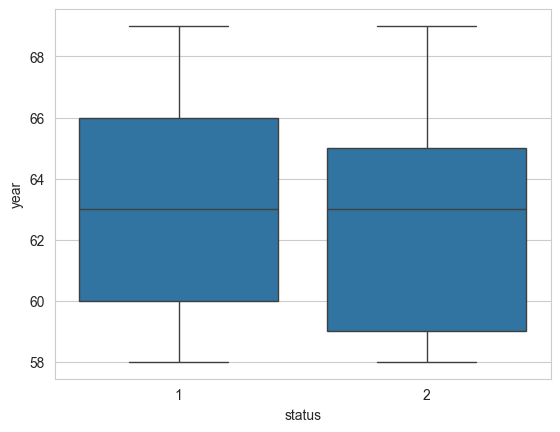

In [20]:
sns.boxplot(data=dataset, x='status', y='year')

<Axes: xlabel='status', ylabel='age'>

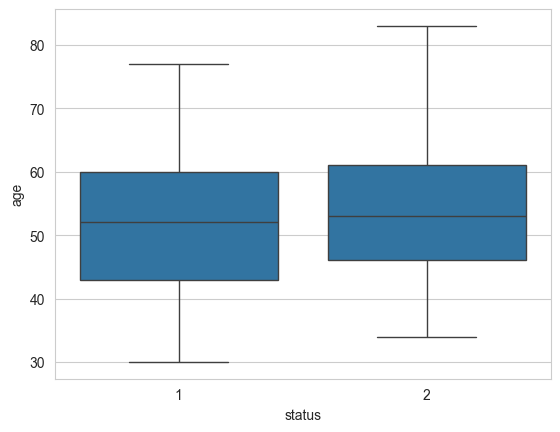

In [21]:
sns.boxplot(data=dataset, x='status', y='age')

<Axes: xlabel='status', ylabel='nodes'>

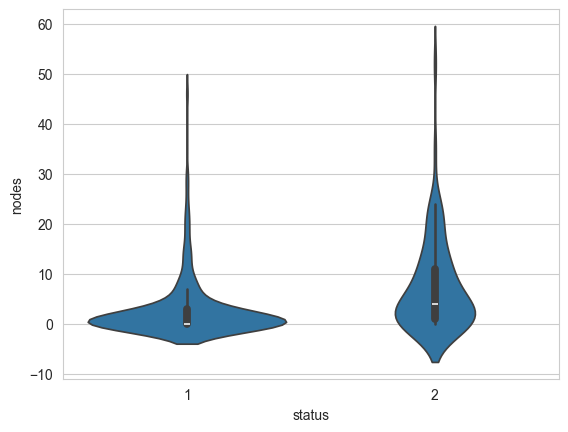

In [22]:
sns.violinplot(x='status', y='nodes', data=dataset)

Here also data is overlapping due to which we are not able to distinguish between the classes